##### 0. Problem Understanding

**Objective Function:**

$$
\text{Maximize} \; z = x_1 + x_2
$$

**Subject to:**

$$
2x_1 + x_2 \geq 10
$$

$$
-3x_1 + 2x_2 \leq 6
$$

$$
x_1 + x_2 \geq 6
$$

**Non-negativity Constraints:**

$$
x_1, x_2 \geq 0
$$


##### 1. Initialize Model

In [9]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [10]:
prob = LpProblem("Simple LP Problem", LpMaximize) # maximization problem

##### 2. Define the decision variables

In [11]:
x1 = LpVariable("x1", lowBound=0) # x1 >= 0
x2 = LpVariable("x2", lowBound=0) # x2 >= 0

##### 3. Define the objective function

In [12]:
prob += x1 + x2, "objective"

##### 4. Define the constraints

In [13]:
# Define the constraints
prob += 2*x1 + x2 >= 10.0, "1st constraint"
prob += -3*x1 + 2*x2 <= 6.0, "2nd constraint"
prob += x1 + x2 >= 6.0, "3rd constraint"

##### 5. Solve the Problem

In [14]:
prob.solve()

# Print the results
print(f"Status: {LpStatus[prob.status]}")
print(f"x1 = {value(x1)}")
print(f"x2 = {value(x2)}")
print(f"Objective (z) = {value(prob.objective)}")

Status: Unbounded
x1 = 0.0
x2 = 0.0
Objective (z) = 0.0


##### 6. Plot the Problem

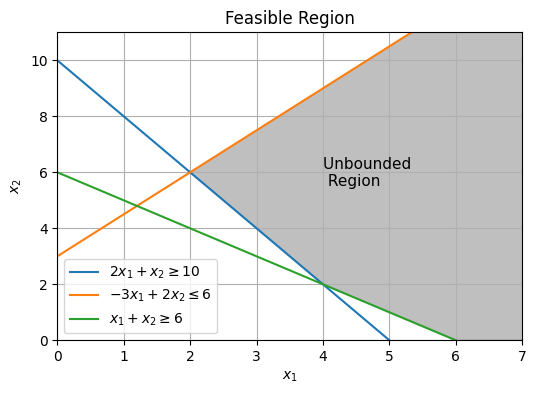

In [15]:
# x -> 1D array with 400 values from 0 to 10 
x = np.linspace(0, 10, 400)

# Constraints
y1 = 10 - 2*x       # 2x1 + x2 = 10
y2 = (6 + 3*x) / 2  # -3x1 + 2x2 = 6
y3 = 6 - x          # x1 + x2 = 6

# Setting figure size
plt.figure(figsize=(6, 4))

# Plotting the lines for constraints
plt.plot(x, y1, label=r'$2x_1 + x_2 \geq 10$')
plt.plot(x, y2, label=r'$-3x_1 + 2x_2 \leq 6$')
plt.plot(x, y3, label=r'$x_1 + x_2 \geq 6$')

# Shading the feasible region
# The lower bound is the maximum of 0, y1, and y3 to satisfy all constraints
lower_bound = np.maximum(0, np.maximum(y1, y3))

# The feasible region is where y2 is greater than or equal to this lower bound
plt.fill_between(x, lower_bound, y2, where=(y2 >= lower_bound), color='gray', alpha=0.5)

# Defining the x and y limits 
plt.xlim(0, 7)
plt.ylim(0, 11)

# Adding axis labels
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Last configs
plt.text(4, 5.5, 'Unbounded \n Region', size = '11')
plt.grid(True)
plt.legend()
plt.title('Feasible Region')

plt.show()